In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_permits = pd.read_csv("./building-permit-applications-data/Building_Permits.csv")
df_permits_col = df_permits[["Permit Type","Filed Date",'Issued Date','Supervisor District','Zipcode','Current Status']]
df_permits_col.columns=['Permit_Type','Filed_Date','Issued_Date','Supervisor_District','Zipcode','Current_Status']

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


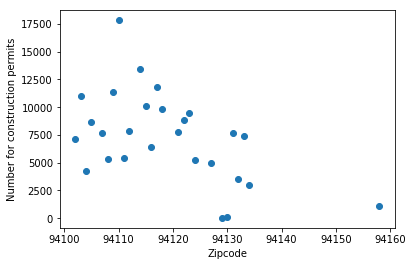

,Zipcode,count
0,94110.0,17837
1,94114.0,13404
2,94117.0,11780
3,94109.0,11348
4,94103.0,10986


In [2]:

g=df_permits_col.Zipcode.value_counts()
g=pd.DataFrame(g)
s=pd.DataFrame(g)
g.reset_index(inplace=True)
g.columns = ["Zipcode","count"]
g.Zipcode.drop_duplicates()
x = g["Zipcode"]
y = g["count"]
g.head()

# x = [2,3,4,5,7,9,13,15,17]
# y = [2,3,4,5,7,9,13,15,17]
plt.scatter(x,y)
plt.ylabel('Number for construction permits')
plt.xlabel('Zipcode')
plt.show()
g.head()


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

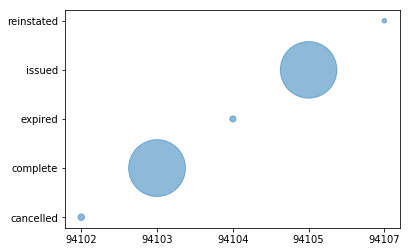

Zipcode  Current_Status
94102.0  cancelled           43
         complete          3231
         expired             37
         issued            3203
         reinstated          20
Name: Delay_Time, dtype: int64

In [3]:
df_permits_col['Issued_Date']= pd.to_datetime((df_permits_col['Issued_Date']), format="%m/%d/%Y")
df_permits_col['Filed_Date']= pd.to_datetime((df_permits_col['Filed_Date']), format="%m/%d/%Y")
df_permits_col['Delay_Time'] = df_permits_col['Issued_Date'].sub(df_permits_col['Filed_Date'], axis=0)
df_permits_col['Delay_Time'] = df_permits_col['Delay_Time'] / np.timedelta64(1, 'D')
df_permits_col = df_permits_col[np.isfinite(df_permits_col['Delay_Time'])]
result=df_permits_col.groupby(['Zipcode', 'Current_Status'])['Delay_Time'].count()

x=['94102','94103','94104','94105','94107']
y=['cancelled','complete','expired','issued','reinstated']
z=result.values
plt.scatter(x, y, s=z, alpha=0.5)
plt.show()
result.head()

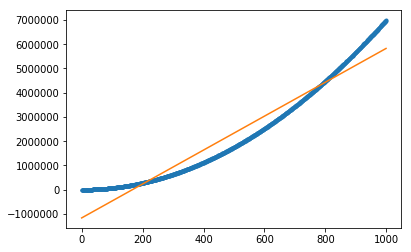

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# sample data
x = np.arange(1000)
y = 7*x**2 +3*x+ 10 

# fit with np.polyfit
m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
plt.show()

In [5]:
def getLabel(input):
    Label = []
    for i in range(len(input)):
        if input.values[i]<90.0:
            Label.append('Quater')
        elif input.values[i]>90.0 and input.values[i]<180.0 :
            Label.append('Half Year')
        elif input.values[i]>180.0 and input.values[i]<366.0 :
            Label.append('One Year')
        else:
            Label.append('More than a Year')
    return Label

In [6]:
df_total_time=df_permits_col['Delay_Time']
Label = getLabel(df_total_time)
df_permits_col['Time_Label']=Label
result_class=df_permits_col.groupby(['Zipcode', 'Time_Label'])['Time_Label'].count()
#print result_class.values

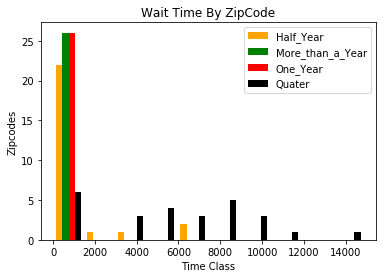

In [13]:
zipList = set()
zipList=df_permits_col['Zipcode']

Half_Year = []
More_than_a_Year = []
One_Year = []
Quater = []

for i in range(0,len(result_class.values),4):
    if(i < len(result_class.values)-4):
        Half_Year.append(result_class.values[i])
        More_than_a_Year.append(result_class.values[i+1])
        One_Year.append(result_class.values[i+2])
        Quater.append(result_class.values[i+3])  

legend = ['Half_Year', 'More_than_a_Year','One_Year','Quater']
plt.hist([Half_Year, More_than_a_Year,One_Year,Quater], color=['orange', 'green','red','black'])
plt.xlabel("Time Class")
plt.ylabel("Zipcodes")
plt.legend(legend)
plt.title('Wait Time By ZipCode')
plt.show()